# Desafío 1 - Grupo 3 - Dataset: Properati

## Limpieza de datos: Metodología de trabajo

* **Módulos y variables utilizados**
    * Imports de bibliotecas utilizadas.
    * Upload de dataset.
    
* **Análisis del dataset**
    * Vista preliminar.
    * Primeras decisiones.
   
* **Limpieza, ordenamiento y manipulación de datos**
* **Guardado de archivo limpio**
* **Upgrade de columnas**

## Módulos y variables utilizados

+ ### Imports de bibliotecas utilizadas

In [0]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid")

* ### Upload del dataset

In [0]:
#Utilizamos a la columna 'Unnamed: 0' como índice.
df = pd.read_csv('properatti.csv', index_col=0, encoding = 'utf-8')


#Forzamos max_columns para poder hacer display de todas ellas
pd.set_option('display.max_columns', None)

#Para ver el contenido total de la fila y evitar los ... (puntos suspensivos)
#pd.set_option('display.max_colwidth', -1)

## Análisis del dataset

* ### Vista preliminar 

In [0]:
#Buscamos primera aproximación a los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 non-null float64
price_usd_per_m2              68617 n

In [0]:
#Vemos el contenido
df.head(3)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [0]:
#Analizamos los distintos contenidos que puede haber dentro de una columna
for col in df.columns:
    print("Columna: ", col, "\nContenido resumido: ", df[col].unique(),"\n")

Columna:  operation 
Contenido resumido:  ['sell'] 

Columna:  property_type 
Contenido resumido:  ['PH' 'apartment' 'house' 'store'] 

Columna:  place_name 
Contenido resumido:  ['Mataderos' 'La Plata' 'Liniers' ... 'Laguna Paiva' 'Malabrigo'
 'Altos de Hudson I'] 

Columna:  place_with_parent_names 
Contenido resumido:  ['|Argentina|Capital Federal|Mataderos|'
 '|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|'
 '|Argentina|Capital Federal|Liniers|' ...
 '|Argentina|Santa Fe|Laguna Paiva|' '|Argentina|Santa Fe|Malabrigo|'
 '|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|Altos de Hudson I|'] 

Columna:  country_name 
Contenido resumido:  ['Argentina'] 

Columna:  state_name 
Contenido resumido:  ['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Costa Atlántica'
 'Entre Ríos' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Córdoba'
 'Bs.As. G.B.A. Zona Oeste' 'Misiones' 'Buenos Aires Interior' 'Salta'
 'Neuquén' 'Río Negro' 'San Luis' 'Mendoza' 'Corrientes' 'Chubut'
 'Tucumán' 'La Pampa' 'Cha

Columna:  properati_url 
Contenido resumido:  ['http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inmobiliaria-fedele'
 'http://www.properati.com.ar/15bob_venta_departamentos_la-plata_balcon_lavadero_toilette_garage_estrenar_antonini-propiedades_dcp'
 'http://www.properati.com.ar/15bod_venta_departamentos_mataderos_lavadero_placard_inmobiliaria-fedele'
 ...
 'http://www.properati.com.ar/1cja7_venta_departamento_villa-urquiza_holmberg_2300_balcon_lavadero_parrilla_terraza_electrogeno_garage_amenities_placard_aire-acondicionado_estrenar_triada-propiedades_geg'
 'http://www.properati.com.ar/1cja8_venta_departamento_plaza-colon_lavadero_luminoso_dependencias_impecable_placard_girard-propiedades_gkl'
 'http://www.properati.com.ar/1cjaa_venta_departamento_capital-federal_baulera_lavadero_lujoso_dependencias_izrastzoff-compania-inmobiliaria'] 

Columna:  description 
Contenido resumido:  ['2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON

In [0]:
#Analizamos la cantidad de datos faltantes para cada columna como porcentaje del total
df.isnull().mean().sort_values(ascending= False)

floor                         0.934837
expenses                      0.882346
rooms                         0.609058
price_usd_per_m2              0.433947
lon                           0.425260
lat-lon                       0.425260
lat                           0.425260
surface_total_in_m2           0.324435
price_per_m2                  0.276869
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
price                         0.168372
surface_covered_in_m2         0.164222
geonames_id                   0.154405
image_thumbnail               0.025672
place_name                    0.000190
description                   0.000016
title                         0.000000
properati_url                 0.000000
state_name                    0.000000
country_name                  0.000000
place_with_parent_names       0.000000
property_type                 0.000000
operation                     0.000000
dtype: float64

* ### Primeras decisiones


Con **_df.info()_** buscamos una primera aproximación a la estructura de los datos. Podemos ver así, que este dataset tiene:
* **Columnas**: 26
* **Filas**: 121220
* **Tipos de dato**: de las 26 columnas, 13 son de tipo float y  12 son object y 1 es int (que usamos como índice).
* Una cantidad de datos no nulos diferente a la cantidad de filas en algunas columnas, indicando que deberemos elaborar una estrategia para su manejo. 

Utilizamos **_df.head()_** para mirar el contenido de los datos y notamos que:

* La columna **'place_with_parent_names'** se formaría con la concatenación, a través del delimitador | (pipe) de las otras columnas del dataset **'country_name'** | **'state_name'**|**'place_name'**.
* Dada la forma en que utilizamos geopandas, conservaremos a las columnas **'lat'** y **'lon'** y eliminaremos a **'lat-lon'** y **'geonames_id'**.
* Podríamos obtener información interesante de **'description'**.
* Decidimos eliminar **'properati_url'** y **'title'**.
* No le encontramos relevancia a conservar la información de **'image_thumbnail'**.
* Existen columnas que no aportan datos por ser constantes: **'operation'** (indica que todas son ventas), **'country_name'** (sólo informa Argentina).
* Existen columnas relevantes con NaN.
* Existen columnas que tienen muy pocos datos:
    * **'floor'**: falta el 93% de los datos.
    * **'rooms'**: falta información en el 88% de los casos. Intentaremos recuperar la cantidad de ambientes de la descripción del anuncio.
    * **'expenses'**: falta el 60% de los datos. Esto no necesariamente sea incorrecto, sino que es un dato muy específico para un tipo de propiedad.
* Existen inconsistencias en los datos de las columnas **'price_usd_per_m2'** y **'price_per_m2'**. Más adelante investigaremos a qué se debe.


#### **En resumen**:
* **Reutilizamos**: Unnamed: 0 como índice del dataframe.
* **Eliminamos**: operation, place_with_parent_names, country_name, geonames_id, lat-lon, floor, rooms, expenses, properati_url, title, image_thumbnail.
* **Conservamos**:
    * _De forma permanente_: property_type, place_name, state_name, lat, lon, surface_total_in_m2, surface_covered_in_m2, price_per_m2, price_usd_per_m2, description
    * _De forma temporal (hasta investigar los datos)_: price, currency, price_aprox_local_currency, price_aprox_usd

## Limpieza, ordenamiento y manipulación de datos

### Primer filtro 

In [0]:
col_keep = ['property_type', 'state_name', 'place_name', 'lat', 'lon', 
            'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd', 
            'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'description']


#Modificamos el dataframe que subimos, para quedarnos con las columnas que queremos trabajar

df = df.loc[:, col_keep]


### Relación entre superficies y precios

Analizando los datos del dataset, concluimos que:

* **'price_usd_per_m2'** se calcula como **'price_aprox_usd'**/**'surface_total_in_m2'** 
* **'price_per_m2'** se calcula como **'price_aprox_usd'**/**'surface_covered_in_m2'**

Entonces, antes de trabajar con las columnas de superficie y precio por metro cuadrado, debemos asegurarnos de ver la calidad de los datos que tenemos en **'price'**, **'currency'**, **'price_aprox_local_currency'** y **'price_aprox_usd'** para **_homogeneizar todos los precios a USD_**: esto nos permitirá eliminar a las columnas **'price'**, **'currency'**, **'price_aprox_local_currency'** y conservar **'price_aprox_usd'**, a partir de la cual podremos recalcular superficies (**'surface_total_in_m2'** y **'surface_covered_in_m2'**) y finalmente precios por metro cuadrado (**'price_usd_per_m2'** y **'price_per_m2'**)


* #### Objetivo 1: Investigar columnas de precios

In [0]:
#Revisamos columnas de precios, todas ellas, para identificar si es posible recuperar datos
col_p = ['price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd', 'price_usd_per_m2', 'price_per_m2']
df.loc[df.price.isnull(), col_p].head()
df.loc[df.price.isnull(), col_p].shape



(20410, 6)

In [0]:
#Vemos que si no hay nada en 'price', no hay nada en el resto, así que las eliminamos. Se eliminarán 20410 rows.

print("Cuando price es null: \n")
print("Valores de currency: ", df['currency'][df.price.isnull()].unique())
print("Valores de price_aprox_local_currency: ", df['price_aprox_local_currency'][df.price.isnull()].unique())
print("Valores de price_aprox_usd: ", df['price_aprox_usd'][df.price.isnull()].unique())
print("Valores de price_usd_per_m2: ", df['price_usd_per_m2'][df.price.isnull()].unique())
print("Valores de price_per_m2: ", df['price_per_m2'][df.price.isnull()].unique())

print("\nComo esta es nuestra variable base, si no tenemos estos datos, vamos a eliminar los registros con price en null.")

Cuando price es null: 

Valores de currency:  [nan]
Valores de price_aprox_local_currency:  [nan]
Valores de price_aprox_usd:  [nan]
Valores de price_usd_per_m2:  [nan]
Valores de price_per_m2:  [nan]

Como esta es nuestra variable base, si no tenemos estos datos, vamos a eliminar los registros con price en null.


In [0]:
df = df.loc[df['price'].notnull(), ]

In [0]:
#Validamos que 121220-20410 = 100810
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100810 entries, 0 to 121219
Data columns (total 14 columns):
property_type                 100810 non-null object
state_name                    100810 non-null object
place_name                    100787 non-null object
lat                           58548 non-null float64
lon                           58548 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           68866 non-null float64
surface_covered_in_m2         87660 non-null float64
price_usd_per_m2              68617 non-null float64
price_per_m2                  87658 non-null float64
description                   100808 non-null object
dtypes: float64(9), object(5)
memory usage: 11.5+ MB


In [0]:
#Pasamos a analizar la columna 'currency':
print("Monedas distintas en el dataset: ", df['currency'].unique())
print("\n")
print("Cantidad de registros con USD: ", df.loc[ df['currency']=='USD', col_p].shape)
print("Cantidad de registros con ARS: ", df.loc[ df['currency']=='ARS', col_p].shape)
print("Cantidad de registros con PEN: ", df.loc[ df['currency']=='PEN', col_p].shape)
print("Cantidad de registros con UYU: ", df.loc[ df['currency']=='UYU', col_p].shape)
print("Cantidad de registros con NaN: ", df.loc[ df['currency']==np.nan, col_p].shape)

print("\nCantidad de registros con información de currency sin nulos: ", df['currency'].value_counts().sum())
print("Cantidad de registros con información de currency con nulos: ", df['currency'].value_counts(dropna=False).sum())


Monedas distintas en el dataset:  ['USD' 'ARS' nan 'PEN' 'UYU']


Cantidad de registros con USD:  (87587, 6)
Cantidad de registros con ARS:  (13219, 6)
Cantidad de registros con PEN:  (2, 6)
Cantidad de registros con UYU:  (1, 6)
Cantidad de registros con NaN:  (0, 6)

Cantidad de registros con información de currency sin nulos:  100809
Cantidad de registros con información de currency con nulos:  100810


In [0]:
#Vemos que hay otro dato null que se escapó al primer filtro por price.notnull, intentemos encontrarlo.
filtro_currency = ['USD', 'ARS', 'PEN', 'UYU']

df.loc[~df['currency'].isin(filtro_currency)]


,property_type,state_name,place_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,description
9761,house,Córdoba,Córdoba,4.545843,-75.678931,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Casa en Venta de 2 dorm. en Armenia


In [0]:
#Vemos que es un caso donde el price está en 0, lo eliminamos

df = df.loc[df['price']!=0, ]

In [0]:
#Existen casos donde la 'currency' == 'USD' y 'price' != 'price_aprox_usd'? No
s = (df['currency']=='USD') & (df['price']!=df['price_aprox_usd'])
df.loc[ s, col_p].head()
df.loc[ s, col_p].shape

(0, 6)

In [0]:
#Ahora vamos a buscar el tipo de cambio para los casos donde currency es distinto de USD
#Usamos 4 decimales para homogeneizar y lo agregamos a la columna 'tc'

df['tc'] = np.round(df['price_aprox_local_currency'] / df['price_aprox_usd'], decimals=4)

In [0]:
#Vemos los datos en la columna nueva y encontramos una constante. 
#Esto nos dice:
# 1. Estamos seguros que los datos en la columna price_aprox_usd son correctos y los podemos usar de base.
# 2. Como nos sirve 'price_aprox_usd', ya podemos descartar 'price', 'currency' y 'price_aprox_local_currency'
#    ya que decidimos informar todo el dataset en dólares.
# 3. Los registros categorizados con monedas 'PEN' y 'URU' deben ser 'ARS'.
#    De cualquier manera no vamos a actuar sobre ellos porque vamos a eliminar a la columna.

df['tc'].unique()

array([17.6445])

In [0]:
df[df['tc']!=17.6445]

,property_type,state_name,place_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,description,tc


##### Segundo filtro

In [0]:
#Eliminamos las columnas 'price', 'currency' y 'price_aprox_local_currency' 
#porque confirmamos que podemos usar 'price_aprox_usd'
#Tambien eliminamos la columna auxiliar de tipo de cambio.

df = df.drop(columns=['price','currency','price_aprox_local_currency', 'tc'])

In [0]:
df.head(2)

,property_type,state_name,place_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,description
0,PH,Capital Federal,Mataderos,-34.661824,-58.508839,62000.0,55.0,40.0,1127.272727,1550.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,..."
1,apartment,Bs.As. G.B.A. Zona Sur,La Plata,-34.903883,-57.964330,150000.0,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...


* #### Objetivo 2: Completar información de superficies que nos permitirá completar los datos de precios por metro cuadrado

In [0]:
#Seleccionamos las columnas que nos interesan para trabajar superficies
col_sup = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2']

In [0]:
#Hay 63352 registros con información de ambas superficies
#De los datos, concluimos que 
#el 'price_usd_per_m2' se calcula como 'price_aprox_usd'/'surface_total_in_m2'
#el 'price_per_m2' se calcula como 'price_aprox_usd'/'surface_covered_in_m2'
s = (df['surface_total_in_m2'].notnull()) & (df['surface_covered_in_m2'].notnull())
#df.loc[ s, col_sup].head()
df.loc[ s, col_sup].shape

(63352, 5)

In [0]:
#Sospechamos entonces, que si no tenemos información de superficies, 
#tampoco la habrá de price_usd_per_m2 ni price_per_m2

print("Si no tenemos información de superficies, no se calculan los valores de precio por m2:\n")
print("Control de price_usd_per_m2 (se calcula sobre superficie_total): ", df.loc[:,'price_usd_per_m2'][(df['surface_total_in_m2'].isnull())].unique())
print("Control de price_per_m2 (se calcula sobre superficie cubierta): ", df.loc[:,'price_per_m2'][(df['surface_covered_in_m2'].isnull())].unique())

Si no tenemos información de superficies, no se calculan los valores de precio por m2:

Control de price_usd_per_m2 (se calcula sobre superficie_total):  [nan]
Control de price_per_m2 (se calcula sobre superficie cubierta):  [nan]


In [0]:
# Vemos los casos donde tengamos una superficie pero no otra

# Caso 1: tenemos superficie total pero no cubierta.
s = (df['surface_total_in_m2'].notnull()) & (df['surface_covered_in_m2'].isnull())

#Validamos que nuestra teoría es correcta y dado este caso, no habrá datos de price_per_m2:

print("Si no hay datos de superficie cubierta, no habrá price_per_m2: ", df.loc[ s, 'price_per_m2'].unique())

# Caso 2: tenemos superficie cubierta pero no total.
s = (df['surface_total_in_m2'].isnull()) & (df['surface_covered_in_m2'].notnull())

#Validamos que nuestra teoría es correcta y dado este caso, no habrá datos de price_usd_per_m2:
print("Si no hay datos de superficie total, no habrá price_usd_per_m2: ", df.loc[ s, 'price_usd_per_m2'].unique())



Si no hay datos de superficie cubierta, no habrá price_per_m2:  [nan]
Si no hay datos de superficie total, no habrá price_usd_per_m2:  [nan]


Aquí debemos tomar otra **decisión**. Dado que el precio por metro cuadrado es nuestra principal variable, no podemos descartar tantos datos nulos, pese a los riesgos que ello conlleva:

* **'price_per_m2'** tiene que ser necesariamente mayor a **'price_usd_per_m2'** porque está calculado sobre una superficie que se supone menor (**'surface_covered_in_m2'** debe ser menor/igual a **'surface_total_in_m2'** y _nunca_ puede ser mayor)
* Entonces si comienzo a considerar que ambas son indistintas: 
    * **'price_per_m2'** subirá la media de precios de **'price_usd_per_m2'** y 
    * **'price_usd_per_m2'** bajará la media de precios de **'price_per_m2'**
    
    
Aún así, decidimos:
* Cuando **'surface_total_in_m2'** sea nula pero tenemos la superficie cubierta, la completamos con **'surface_covered_in_m2'**.
* Cuando **'surface_covered_in_m2'** sea nula pero tenemos la superficie total, la completamos con **'surface_total_in_m2'**.
* Al tener estos datos completos, ya podemos recalcular a las varibles **'price_usd_per_m2'** y **'price_per_m2'**.

También validaremos que la superficie cubierta no pueda ser mayor a la total, dado que eso modificaría los precios por metro cuadrado.

In [0]:
# Si la superficie total es nula pero la cubierta no lo es, rellenamos total con cubierta siempre que tengamos el dato
# de price_aprox_usd para respetar la lógica del resto de los datos
# Hay 24308 datos que cumplen esta condición

s = (df['surface_total_in_m2'].isnull()) & (df['surface_covered_in_m2'].notnull()) & (df['price_aprox_usd'].notnull())
#df.loc[s, col_sup].head()
df.loc[s, col_sup].shape



(24308, 5)

In [0]:
#Rellenamos total con cubierta
df.loc[s, ['surface_total_in_m2']] = df['surface_covered_in_m2']

#Y también rellenamos price_usd_per_m2 con el price_per_m2 ó mejor aún recalculándolo con proce_aprox_usd
df.loc[s, ['price_usd_per_m2']] = df['price_aprox_usd']/df['surface_total_in_m2']



In [0]:
df[col_sup][df.index==68]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
68,235000.0,72.0,72.0,3263.888889,3263.888889


In [0]:
# Hacemos lo mismo pero con la superficie cubierta
# Si la superficie total tiene datos pero la cubierta no, rellenamos cubierta con total siempre que tengamos el dato
# de price_aprox_usd para respetar la lógica del resto de los datos
# Hay 5514 registros que cumplen esta condición
s = (df['surface_total_in_m2'].notnull()) & (df['surface_covered_in_m2'].isnull()) & (df['price_aprox_usd'].notnull())
df.loc[s, col_sup].head()
#df.loc[s, col_sup].shape


,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
10,70000.00,1514.0,NaN,46.235139,NaN
15,250000.00,164.0,NaN,1524.390244,NaN
66,72900.00,38.0,NaN,1918.421053,NaN
142,90000.00,380.0,NaN,236.842105,NaN
168,140209.19,195.0,NaN,719.021487,NaN


In [0]:
#Rellenamos cubierta con total
df.loc[s, ['surface_covered_in_m2']] = df['surface_total_in_m2']
#Y también rellenamos price_per_m2 con el price_usd_per_m2 ó mejor aún recalculándolo con proce_aprox_usd
df.loc[s, ['price_per_m2']] = df['price_aprox_usd']/df['surface_covered_in_m2']


In [0]:
df[col_sup][df.index==10]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
10,70000.0,1514.0,1514.0,46.235139,46.235139


In [0]:
#Volvemos a validar si hay datos vacíos en superficie total. Sí, hay 7635, pero no tenemos forma de recuperar el precio
#porque tampoco hay datos de precio por superficie
#s = (df['surface_total_in_m2'].isnull() & df['surface_covered_in_m2'].isnull() & df['price_usd_per_m2'].isnull() & df['price_per_m2'].isnull())

s = (df['surface_total_in_m2'].isnull())
df.loc[s,col_sup].head()
#df.loc[s,col_sup].shape


,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
1,150000.00,NaN,NaN,NaN,NaN
3,95000.00,NaN,NaN,NaN,NaN
9,25798.49,NaN,NaN,NaN,NaN
11,150000.00,NaN,NaN,NaN,NaN
65,50000.00,NaN,NaN,NaN,NaN


In [0]:
#Y al corroborar lo mismo con superficie cubierta, vemos que son los mismos registros
s = (df['surface_covered_in_m2'].isnull())
df.loc[s,col_sup].head()
#df.loc[s,col_sup].shape


,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
1,150000.00,NaN,NaN,NaN,NaN
3,95000.00,NaN,NaN,NaN,NaN
9,25798.49,NaN,NaN,NaN,NaN
11,150000.00,NaN,NaN,NaN,NaN
65,50000.00,NaN,NaN,NaN,NaN


In [0]:
#Los eliminamos porque no tenemos forma de recuperar el precio
df = df.loc[df['surface_total_in_m2'].notnull(), ]

In [0]:
df[col_sup][df.index==1]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2


In [0]:
#Sigo buscando los casos donde el precio por m2 no está
#Hay 249 registros que no tienen price_usd_per_m2: se debe a que tanto la superficie total como cubierta se informan en 0.
s = (df['price_usd_per_m2'].isnull())
df.loc[s,col_sup].head()
#df.loc[s,col_sup].shape


,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
205,180000.00,0.0,0.0,NaN,inf
206,350000.00,0.0,0.0,NaN,inf
561,42623.59,0.0,0.0,NaN,inf
562,35893.55,0.0,0.0,NaN,inf
563,59000.00,0.0,0.0,NaN,inf


In [0]:
#Los eliminamos porque no podemos recuperar el precio por metro cuadrado.
df = df.loc[df['price_usd_per_m2'].notnull(), ]

In [0]:
df[col_sup][df.index==205]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2


In [0]:
#2 casos donde price_per_m2 es null: se deben a que la superficie cubierta se marcó en 0.
s = (df['price_per_m2'].isnull())
df.loc[s,col_sup].head()
#df.loc[s,col_sup].shape

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
7949,102800.0,32.0,0.0,3212.500000,NaN
28938,22400.0,13.0,0.0,1723.076923,NaN


In [0]:
#Se va a reemplazar con el valor de superficie total y se recalcula el precio
df.loc[s, ['surface_covered_in_m2']] = df['surface_total_in_m2']
df.loc[s, ['price_per_m2']] = df['price_aprox_usd']/df['surface_covered_in_m2']

In [0]:
#df[df.index == 7949]
df[col_sup][df.index == 28938]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
28938,22400.0,13.0,13.0,1723.076923,1723.076923


In [0]:
#Verificamos casos donde la superficie total sea menor a la cubierta. Hay 977 casos
s = (df['surface_covered_in_m2'] > df['surface_total_in_m2'])
df.loc[s,col_sup].head()
#df.loc[s,col_sup].shape

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
78,308460.22,261.0,18615.0,1181.839923,295.460650
177,470000.00,420.0,450.0,1119.047619,1044.444444
316,430000.00,125.0,156.0,3440.000000,2756.410256
317,430000.00,125.0,156.0,3440.000000,2756.410256
455,119000.00,170.0,430.0,700.000000,276.744186


In [0]:
#Les cambiamos entonces,la cubierta por la total y también recalculamos los precios
df.loc[s,['surface_covered_in_m2']] = df['surface_total_in_m2']
df.loc[s, ['price_per_m2']] = df['price_aprox_usd']/df['surface_covered_in_m2']

In [0]:
df[col_sup][df.index == 78]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
78,308460.22,261.0,261.0,1181.839923,1181.839923


In [0]:
#Finalmente validamos que el precio m2 que se calcula sobre la superficie total no sea mayor al que se calcula
#sobre la superficie cubierta
s = (df['price_usd_per_m2'] > df['price_per_m2'])
df.loc[s,col_sup].head()
#df.loc[s,col_sup].shape

#La consulta nos devuelve 4111 registros pero estimamos se trata de un problema de decimales. No se toma acción.

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
15,250000.0,164.0,164.0,1524.390244,1524.390244
79,118000.0,42.0,42.0,2809.523810,2809.523810
89,50000.0,53.0,53.0,943.396226,943.396226
93,385000.0,416.0,416.0,925.480769,925.480769
94,135000.0,95.0,95.0,1421.052632,1421.052632


In [0]:
#s = (df['surface_total_in_m2'].isnull())
#s = (df['surface_total_in_m2']==0)

#s = (df['surface_covered_in_m2'].isnull())
#s = (df['surface_covered_in_m2']==0)

#s = (df['surface_covered_in_m2']>df['surface_total_in_m2'])

#s = (df['price_usd_per_m2'].isnull())
#s = (df['price_usd_per_m2']==0)

#s = (df['price_per_m2'].isnull())
#s = (df['price_per_m2']==0)

s = (df['price_usd_per_m2']>df['price_per_m2'])


#df.loc[s,col_sup].head()
df.loc[s,col_sup].shape

(4111, 5)

A estas alturas ya no hay registros que tengan:
* Superficie total nula o 0.
* Superficie cubierta nula o 0.
* Superficies cubiertas mayores a las totales.
* Precios por m2 basados en superficie total nulos o en 0.
* Precios por m2 basados en superficie cubierta nulos o en 0.
* Precios por m2 basados en superficie total mayores a Precios por m2 basados en superficie cubierta. En realidad las consultas indican que sí, pero estimamos se trata de un problema de decimales, razón por la cual no hemos tomado acción alguna al respecto.



### Manejo de duplicados

In [0]:
df.duplicated().value_counts(dropna=False)

False    90169
True      2756
dtype: int64

In [0]:
df[df.duplicated()].sort_values(by=['place_name', 'lat', 'lon', 'price_aprox_usd'])

,property_type,state_name,place_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,description
116909,apartment,Capital Federal,Abasto,-34.603329,-58.410789,65000.0,28.0,28.0,2321.428571,2321.428571,APTO CREDITO HIPOTECARIO DPTO 2 AMBIENTES in...
71972,apartment,Capital Federal,Abasto,-34.600586,-58.410769,82000.0,37.0,37.0,2216.216216,2216.216216,Excelente emprendimiento en muy buena ubicació...
27164,apartment,Capital Federal,Abasto,NaN,NaN,55000.0,30.0,30.0,1833.333333,1833.333333,DEPARTAMENTO DE 1 AMBIENTE EN VENTAUBICADO AL ...
98094,apartment,Capital Federal,Abasto,NaN,NaN,97000.0,33.0,31.0,2939.393939,3129.032258,OPORTUNIDAD! Hermoso monoambiente AMOBLADO en ...
98352,apartment,Capital Federal,Abasto,NaN,NaN,97000.0,33.0,31.0,2939.393939,3129.032258,OPORTUNIDAD! Hermoso monoambiente AMOBLADO en ...
23928,apartment,Bs.As. G.B.A. Zona Norte,Acassuso,NaN,NaN,88000.0,38.0,38.0,2315.789474,2315.789474,"Departamento en muy buena ubicacion, frente a ..."
39043,apartment,Bs.As. G.B.A. Zona Norte,Acassuso,NaN,NaN,155000.0,65.0,65.0,2384.615385,2384.615385,Departamento muy lindo y luminoso!Living comed...
1502,house,Bs.As. G.B.A. Zona Norte,Acassuso,NaN,NaN,450000.0,346.0,258.0,1300.578035,1744.186047,Excelente ubicaciÃ³n a metros de Av. Libertado...
69913,apartment,Bs.As. G.B.A. Zona Sur,Adrogué,NaN,NaN,110000.0,50.0,50.0,2200.000000,2200.000000,DOS AMBIENTES A ESTRENAR.- CONSULTENOS X MAS ...
60166,apartment,Capital Federal,Agronomía,-34.585972,-58.490251,124000.0,47.0,40.0,2638.297872,3100.000000,"Hermosisimo departamento con dos balcones, uno..."


In [0]:
#Eliminamos duplicados
df.drop_duplicates(inplace=True)

### Identificación de outliers

Concentramos el análisis en las variables **'surface_total_in_m2'**, **'surface_covered_in_m2'** y **'price_usd_per_m2'**.

Con **_df.describe()_** y herramientas gráficas notamos que los rangos de precios y superficies son muy extremos. Conservando estos datos:
* la media no será una medida de tendencia central representativa.
* los boxplots son tan angostos que apenas pueden observarse datos.

Entonces decidimos:
* Fijar el precio máximo en 8000 dolares el m2 (price_usd_per_m2), segun información respaldatoria: http://blog.properati.com.ar/puerto-madero-se-consolida-como-el-barrio-mas-caro-de-la-region/

* Consideramos a superficies razonables:
    * cubiertas (surface_covered_in_m2): a aquellas que estén entre 20 y 300 metros cuadrados.
    * totales (surface_total_in_m2): a aquellas que estén entre 20 y 1000 metros cuadrados.



In [0]:
df.describe()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
count,52908.000000,52908.000000,9.016900e+04,90169.000000,90169.000000,9.016900e+04,9.016900e+04
mean,-34.747217,-58.990266,2.453039e+05,202.859786,133.695749,2.736545e+03,6.492036e+03
std,1.745650,1.938032,3.670531e+05,1625.112042,981.441409,1.754522e+04,2.767426e+04
min,-54.819736,-71.665143,4.666620e+03,1.000000,1.000000,6.000000e-01,1.000000e+00
25%,-34.656117,-58.652321,9.200000e+04,50.000000,45.000000,1.225000e+03,1.509859e+03
50%,-34.597959,-58.464501,1.500000e+05,82.000000,74.000000,1.794872e+03,2.160000e+03
75%,-34.497458,-58.394007,2.750000e+05,188.000000,150.000000,2.468750e+03,3.254545e+03
max,-23.137164,-54.556127,4.654544e+07,200000.000000,200000.000000,2.600000e+06,4.000000e+06


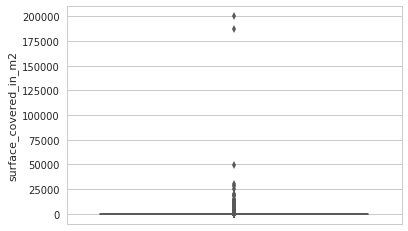

In [0]:
#Graficamos
bx_supc = sns.boxplot(y='surface_covered_in_m2',  data=df, palette="Set2")

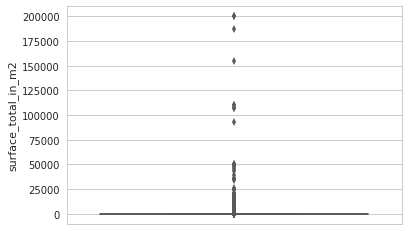

In [0]:
bx_supt = sns.boxplot(y='surface_total_in_m2',  data=df, palette="Set2")

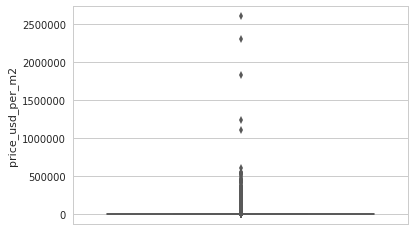

In [0]:
#Graficamos a la variable 'price_usd_per_m2'
bx_price_m2 = sns.boxplot(y="price_usd_per_m2",  data=df, palette="Set2")

In [0]:
#Seguimos trabajando con las mismas columnas que en el caso de superficies, así que reutilizamos col_sup
#Filtramos aquellos registros donde el precio por m2 sea mayor a USD 8000
#Eliminaremos 2067 registros
o = (df['price_usd_per_m2']>8000)

df.loc[o,col_sup].head()
#df.loc[o,col_sup].shape

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
57,250000.0,30.0,30.0,8.333333e+03,8.333333e+03
173,750000.0,20.0,20.0,3.750000e+04,3.750000e+04
277,470000.0,20.0,20.0,2.350000e+04,2.350000e+04
302,370000.0,20.0,20.0,1.850000e+04,1.850000e+04
349,1236000.0,1.0,1.0,1.236000e+06,1.236000e+06


In [0]:
#Entonces conservamos en el dataframe aquellos precios por m2 menores a USD 8000
df = df.loc[df['price_usd_per_m2']<8000, ]

In [0]:
df[col_sup][df.index == 57]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2


In [0]:
#Trabajamos con las superficies cubiertas
#Cantidad de registros cuya superficie cubierta es menor a 20 y mayor a 300 m2: 6338

df.loc[(df['surface_covered_in_m2']<20) | (df['surface_covered_in_m2']>300), col_sup].head()
#df.loc[(df['surface_covered_in_m2']<20) | (df['surface_covered_in_m2']>300), col_sup].shape

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
10,70000.0,1514.0,1514.0,46.235139,46.235139
27,650000.0,425.0,425.0,1529.411765,1529.411765
36,400000.0,400.0,400.0,1000.000000,1000.000000
51,550000.0,504.0,324.0,1091.269841,1697.530864
58,3000000.0,1300.0,800.0,2307.692308,3750.000000


In [0]:
#Conservamos aquellos registros cuya superficie cubierta esté entre 20 y 300 m2
df = df.loc[(df['surface_covered_in_m2']> 20) & (df['surface_covered_in_m2']<300), ]

In [0]:
df[col_sup][df.index == 121130]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2


In [0]:
df[col_sup][df.index == 10]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2


In [0]:
#Buscamos a las superficies totales menores a 20 o mayores a 1000
#Hay 588 registros que cumplen esta condición


df.loc[(df['surface_total_in_m2']<20) | (df['surface_total_in_m2']>1000), col_sup].head()
#df.loc[(df['surface_total_in_m2']<20) | (df['surface_total_in_m2']>1000), col_sup].shape




,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
64,300000.0,1085.0,260.0,276.497696,1153.846154
430,150000.0,1500.0,100.0,100.000000,1500.000000
516,430000.0,1132.0,251.0,379.858657,1713.147410
517,495000.0,1120.0,254.0,441.964286,1948.818898
518,500000.0,1050.0,280.0,476.190476,1785.714286


In [0]:
df = df.loc[(df['surface_total_in_m2']>20) & (df['surface_total_in_m2']<1000), ]

In [0]:
df[col_sup][df.index == 64]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2


In [0]:
#Comprobamos que hemos mejorado los datos
df.describe()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
count,47129.000000,47129.000000,7.951600e+04,79516.000000,79516.000000,79516.000000,79516.000000
mean,-34.802229,-58.929321,1.881549e+05,122.179197,93.800506,1933.441828,5704.472481
std,1.717966,1.858104,1.637137e+05,125.626895,64.333566,1013.216169,11211.578107
min,-54.819736,-71.663515,4.666620e+03,21.000000,21.000000,19.050136,30.399476
25%,-34.659543,-58.633874,8.900000e+04,49.000000,45.000000,1275.510204,1556.603774
50%,-34.599717,-58.459966,1.390000e+05,77.000000,70.000000,1812.500000,2184.210526
75%,-34.528120,-58.391810,2.350000e+05,150.000000,125.000000,2433.407080,3200.000000
max,-23.137164,-54.556127,4.000000e+06,999.000000,299.000000,7978.723404,476190.476190


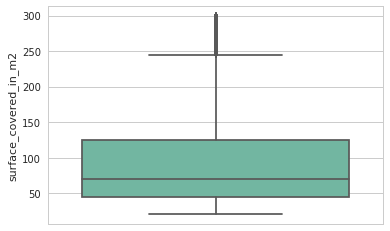

In [0]:
bx_supc = sns.boxplot(y='surface_covered_in_m2',  data=df, palette="Set2")

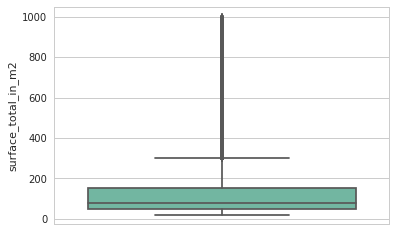

In [0]:
bx_supt = sns.boxplot(y='surface_total_in_m2',  data=df, palette="Set2")

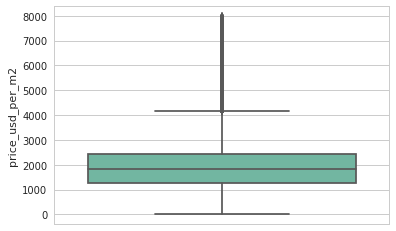

In [0]:
bx_price_m2 = sns.boxplot(y="price_usd_per_m2",  data=df, palette="Set2")

### Mejoramiento en columnas 

**place_name**

In [0]:
pn = (df['place_name'].isnull())

#df.loc[pn, ].head()
df.loc[pn, ].shape

(14, 11)

In [0]:
#Hay 13 filas que tienen el place_name en nulo, tienen lat y lon?
pn = (df['place_name'].isnull() & df['lat'].notnull() & df['lon'].notnull())

#df.loc[pn, ].head()
df.loc[pn, ].shape

#Así que vamos a recuperar sus nombres de barrio según sus coordenadas.

(14, 11)

**description**

In [0]:
#Existe un caso donde la columna no tiene datos
df[df['description'].isnull()]

,property_type,state_name,place_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,description
96691,apartment,Bs.As. G.B.A. Zona Norte,San Fernando,NaN,NaN,98000.0,55.0,55.0,1781.818182,1781.818182,NaN


In [0]:
#Lo rellenamos con la leyenda "No disponible" para asegurarnos que no falle al hacer el regex
df.fillna({'description': "No disponible"}, inplace=True)


In [0]:
df[df.index == 96691]

,property_type,state_name,place_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,description
96691,apartment,Bs.As. G.B.A. Zona Norte,San Fernando,NaN,NaN,98000.0,55.0,55.0,1781.818182,1781.818182,No disponible


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79516 entries, 0 to 121219
Data columns (total 11 columns):
property_type            79516 non-null object
state_name               79516 non-null object
place_name               79502 non-null object
lat                      47129 non-null float64
lon                      47129 non-null float64
price_aprox_usd          79516 non-null float64
surface_total_in_m2      79516 non-null float64
surface_covered_in_m2    79516 non-null float64
price_usd_per_m2         79516 non-null float64
price_per_m2             79516 non-null float64
description              79516 non-null object
dtypes: float64(7), object(4)
memory usage: 7.3+ MB


### Guardado de archivo limpio

In [0]:
df2 = df[['price_usd_per_m2', 'price_aprox_usd', 'surface_covered_in_m2', 'surface_total_in_m2' ]]

Realizamos un heatmap para tener una pantallazo rápido de como es el grado de correlación entre la variables continuas

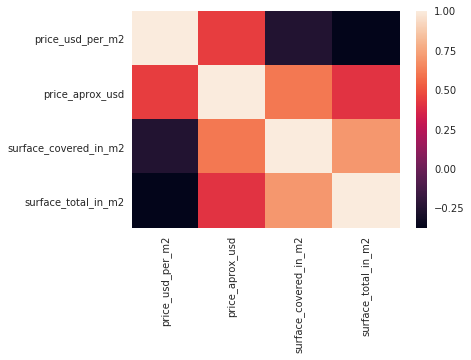

In [0]:
sns.heatmap(df2.corr())

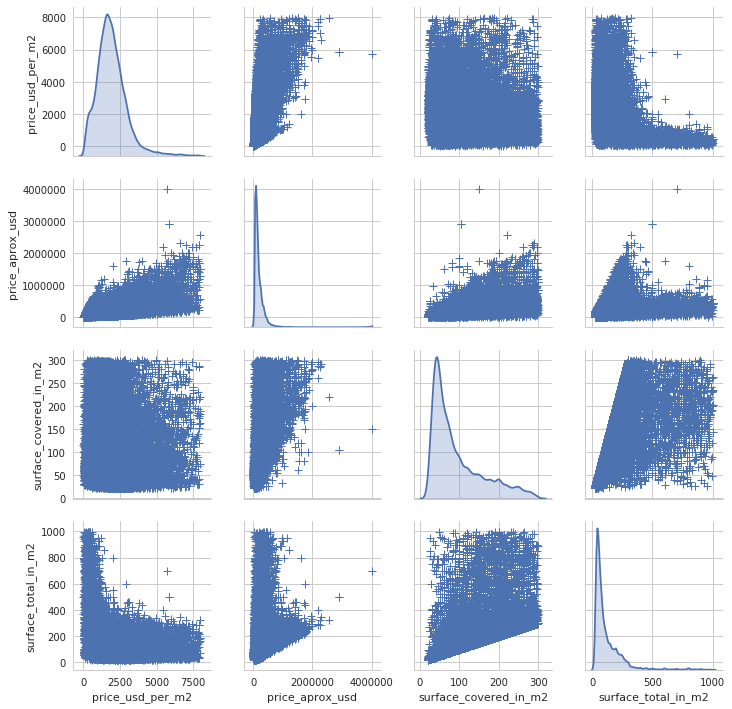

In [0]:
sns.pairplot(df2, diag_kind="kde", markers="+", plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))

En relación al precio x m2: Observamos que el precio tiene una correlación lineal modesta, no hay una asociación clara con la superficie cubierta y la r

### Upgrades de información

#### Determinar la cantidad de ambientes

In [0]:
#Levanto el csv limpio
df_amb = pd.read_csv('properatti_limpio.csv', index_col=0, encoding = 'utf-8')


#df = pd.read_csv('properatti.csv', index_col=0, encoding = 'utf-8')

In [0]:
#Copia del dataset filtrado
#df_amb= df.loc[:, :]

In [0]:
df_amb.head(3)

,property_type,state_name,place_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,description
0,PH,Capital Federal,Mataderos,-34.661824,-58.508839,62000.0,55.0,40.0,1127.272727,1550.000000,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,..."
2,apartment,Capital Federal,Mataderos,-34.652262,-58.522982,72000.0,55.0,55.0,1309.090909,1309.090909,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...
4,apartment,Buenos Aires Costa Atlántica,Centro,-38.002626,-57.549447,64000.0,35.0,35.0,1828.571429,1828.571429,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...


In [0]:
busca_num = {'uno' : '1' , 'dos' : '2' , 'tres' : '3' , 'cuatro' : '4' ,
             'cinco' : '5' , 'seis' : '6' , 'siete' : '7' , 
             'mono' : '1' , 'mon' : '1' , 'nan' : np.nan}

In [0]:
#df_amb['ambientes'] = df_amb['ambientes'].str.lower()

In [0]:
#Falta pulir porque los datos están muy heterogéneos
df_amb['ambientes'].unique()

KeyError: 'ambientes'

In [0]:
df_amb['ambientes'] = df_amb['ambientes'].astype('str')
df_amb['ambientes'].dtypes

KeyError: 'ambientes'

In [0]:
df_amb['ambientes']=df_amb['ambientes'].str.strip()

In [0]:
df_amb['ambientes'].unique()

array(['2', 'nan', 'mono', 'dos', '3', '4', 'cuatro', 'cinco', 'tres',
       '1', '5', '7', '6', '180', '10', '042', '23', '8', '103', '42026',
       '072', '1300', '902', '18', '000', '944', 'uno', '9', '153', '12',
       '43', '22', '42022', '472', '6500', '281', 'siete', '442', '24',
       '22330489662', 'seis', 'mon', '20173', '9502', '1200', '772',
       '652', '00', '219', '653', '983', '42025', '42004', '773', '42028',
       '151', '42046', '502', '42049', '152', '412', '42015', '42021',
       '44', '11', '172', '28612', '20174', '300', '693', '622', '733',
       '14', '183', '793', '262', '253', '90', '913', '20171', '20172',
       '853', '173', '162', '0002', '123', '0', '202', '192', '113', '50',
       '5700', '2004', '232', '20', '65', '822', '562', '42054', '35',
       '293', '2018', '872', '164', '312', '42024'], dtype=object)

In [0]:
df_amb['ambientes'].replace(busca_num, inplace=True)

In [0]:
df_amb.head(10)

,property_type,state_name,place_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,description,ambientes
0,PH,Capital Federal,Mataderos,-34.661824,-58.508839,62000.0,55.0,40.0,1127.272727,1550.000000,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2
2,apartment,Capital Federal,Mataderos,-34.652262,-58.522982,72000.0,55.0,55.0,1309.090909,1309.090909,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2
4,apartment,Buenos Aires Costa Atlántica,Centro,-38.002626,-57.549447,64000.0,35.0,35.0,1828.571429,1828.571429,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,NaN
6,PH,Bs.As. G.B.A. Zona Norte,Munro,-34.532957,-58.521782,130000.0,106.0,78.0,1226.415094,1666.666667,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,NaN
7,apartment,Capital Federal,Belgrano,-34.559873,-58.443362,138000.0,45.0,40.0,3066.666667,3450.000000,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,1
8,apartment,Capital Federal,Belgrano,-34.559873,-58.443362,195000.0,65.0,60.0,3000.000000,3250.000000,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,2
12,apartment,Bs.As. G.B.A. Zona Norte,Martínez,-34.486019,-58.503814,115000.0,39.0,36.0,2948.717949,3194.444444,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,2
13,apartment,Capital Federal,Palermo Soho,NaN,NaN,111700.0,50.0,30.0,2234.000000,3723.333333,Torre I Mondrian. 3 ambientes con terraza y d...,3
14,apartment,Capital Federal,Palermo Soho,NaN,NaN,147900.0,42.0,31.0,3521.428571,4770.967742,Torre II Dalí. Ambiente unico divisible.Vitrau...,NaN
15,house,Bs.As. G.B.A. Zona Norte,Bella Vista,-34.587911,-58.698783,250000.0,164.0,164.0,1524.390244,1524.390244,ULTIMA UNIDAD DISPONIBLEHAUS BOULEVARD: Metros...,NaN


In [0]:
df_amb['ambientes'].unique()

array(['2', nan, '1', '3', '4', '5', '7', '6', '180', '10', '042', '23',
       '8', '103', '42026', '072', '1300', '902', '18', '000', '944', '9',
       '153', '12', '43', '22', '42022', '472', '6500', '281', '442',
       '24', '22330489662', '20173', '9502', '1200', '772', '652', '00',
       '219', '653', '983', '42025', '42004', '773', '42028', '151',
       '42046', '502', '42049', '152', '412', '42015', '42021', '44',
       '11', '172', '28612', '20174', '300', '693', '622', '733', '14',
       '183', '793', '262', '253', '90', '913', '20171', '20172', '853',
       '173', '162', '0002', '123', '0', '202', '192', '113', '50',
       '5700', '2004', '232', '20', '65', '822', '562', '42054', '35',
       '293', '2018', '872', '164', '312', '42024'], dtype=object)

In [0]:
col_amb = ['property_type', 'place_name','surface_total_in_m2', 'surface_covered_in_m2', 'description', 'ambientes']

lista_amb = ['0', '1', '2', '3', '4', '5', '6', '7', np.nan]
amb = (~df_amb['ambientes'].isin(lista_amb))

#También puede pasar que diga "ambientes 2" en vez de "2 ambientes"
df_amb.loc[amb, col_amb]
#df.loc[o,col_sup].shape

,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,description,ambientes
4286,apartment,Marinas Golf Barrio Cerrado,140.0,140.0,LINDÍSIMO DEPARTAMENTO CON ESPECTACULAR VISTA ...,180
5179,house,Tigre,849.0,209.0,Casa en venta en el barrio cerrado San Gabriel...,10
5229,apartment,Palermo Chico,55.0,51.0,El precio de la cochera no está incuida en el ...,042
6017,apartment,Pinamar,65.0,65.0,A METROS DEL MARDESCRIPCION:A estrenar en 2 pl...,23
7392,apartment,Recoleta,309.0,262.0,"Piso de 8 ambientes, al frente con patio. Impo...",8
...,...,...,...,...,...,...
119634,apartment,Belgrano,158.0,158.0,Corredor Responsable: Uno Bienes Raices SRL - ...,42004
119671,apartment,Palermo,61.0,61.0,Corredor Responsable: Jorge Salafia - CUCICBA ...,733
119883,apartment,Palermo,32.0,32.0,Corredor Responsable: Luis Roman Garcia - C.U....,312
119900,apartment,Belgrano,143.0,143.0,Corredor Responsable: Gustavo Guastello - C.U....,42024


#### Servicios

Preparamos el dataset para machine learning

In [0]:
#Hago una copia del dataset que ya tenemos filtrado

df_serv= df.loc[:, :]

In [0]:
df_serv.info()

In [0]:
servicios = ['gimnasio','piscina', 'vigilancia', 'terraza', 'parrilla', 'balcon', 'cochera', 'sum', 'jardin']

In [0]:
def busca_serv(x, lista):
    
    # Init de dataframe
    d = {col: 0 for col in lista}
    
    texto = x.lower()
    
    # Busca coincidencias
    if re.search(r'gim|gym', texto): 
        d[lista[0]] = 1
    if re.search(r'pile|pisc', texto): 
        d[lista[1]] = 1
    if re.search(r'vigil|seguri', texto): 
        d[lista[2]] = 1
    if re.search(r'terraza|terr', texto): 
        d[lista[3]] = 1
    if re.search(r'parri', texto): 
        d[lista[4]] = 1
    if re.search(r'balcón|balcon', texto): 
        d[lista[5]] = 1
    if re.search(r'coch', texto): 
        d[lista[6]] = 1
    if re.search(r'sum', texto): 
        d[lista[7]] = 1
    if re.search(r'jardín|jardin', texto): 
        d[lista[8]] = 1
    
    return pd.DataFrame.from_dict(d, orient='index').T

In [0]:
#Creamos un nuevo dataframe que contenga las columnas de servicios

dummy_s = pd.DataFrame(columns=servicios)

for fila in df_serv.description:
    reg = busca_serv(fila, servicios)
    dummy_s = pd.concat([dummy_s, reg])

In [0]:
dummy_s.head()

In [0]:
#df_serv.reset_index(inplace=True)
dummy_s.reset_index(inplace=True)
dummy_s.drop('index', axis=1, inplace=True)

In [0]:
df_serv.info()

In [0]:
df_serv = df_serv.join(dummy_s)

In [0]:
df_serv.info()

In [0]:
df_serv.head(5)

In [0]:
df_serv[df_serv['jardin'] == 1] 

In [0]:
df_serv['description'][15]

### GeoPandas

In [0]:
import geopandas
import folium
import fiona
import rtree
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 10

barrios = pd.read_csv("barrios.csv", encoding='latin1')

In [0]:
def from_wkt(df, wkt_column):
    import shapely.wkt
    df["coordinates"]= df[wkt_column].apply(shapely.wkt.loads)
    gdf = geopandas.GeoDataFrame(barrios, geometry='coordinates')
    return gdf

In [0]:
barrios = from_wkt(barrios, "WKT")

In [0]:
def from_x_y(df, x, y):
    from shapely.geometry import Point
    gdf = geopandas.GeoDataFrame(df.drop([x, y], axis=1),
                                crs={'init': 'epsg:4326'},
                                geometry=[Point(xy) for xy in zip(df[x], df[y])])
    return gdf

In [0]:
df_geo = df.copy()#[df['state_name']=='Capital Federal']   # me quedo solo con propiedades en CABA
df_geo.drop(['property_type', 'state_name', 'price_aprox_usd','surface_covered_in_m2',
                     'description', 'surface_total_in_m2','price_per_m2', 'ambientes'], axis =1, inplace = True)
df_geo.dropna(subset = ['lat', 'lon'], inplace = True) #por si hay lat o lon NaA 
df_geo = df_geo.sample(5000)

df_heat= df_geo.dropna() #correr esta línea para heatmap
df_map = from_x_y(df_geo, "lon", "lat") #correr esta línea para un mapa de puntos

### Heatmap

In [0]:
from folium.plugins import HeatMap

max_amount = float(df_heat['price_usd_per_m2'].max())*50

hmap = folium.Map(location=[-34.606359, -58.443863], zoom_start=12, )

hm_wide = HeatMap( list(zip(df_heat['lat'].values, df_heat['lon'].values, df_heat.price_usd_per_m2.values)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=2, 
                 )

folium.GeoJson(barrios.to_json()).add_to(hmap)

hmap.add_child(hm_wide)

### Mapa

In [0]:
m = folium.Map([-34.606359, -58.443863], zoom_start=5, tiles='openstreetmap')
folium.GeoJson(barrios.to_json()).add_to(m)
folium.GeoJson(df_map.to_json()).add_to(m)
m

### Crímenes

In [0]:
homic = pd.read_csv('homicidio.csv')
hurto = pd.read_csv('hurto.csv')
hur_aut = pd.read_csv('hurto_auto.csv')
robo = pd.read_csv('robo.csv')
robo_auto = pd.read_csv('robo auto.csv')
pob = pd.read_csv('población CABA.csv')

In [0]:
#uno todas las tablas de crímenes

crimen = pd.merge(hurto, homic, how='outer')
crimen = pd.merge(crimen, hur_aut, how='outer')
crimen = pd.merge(crimen, robo, how='outer')
crimen = pd.merge(crimen, robo_auto, how='outer')
crimen['total'] = crimen.iloc[:, 1:].sum(axis=1) # creo una columna total de crímenes
crimen = crimen.drop(['CANTIDAD DE DELITOS DE HURTO (SIN VIOLENCIA)',
       'CANTIDAD DE DELITOS DE HOMICIDIO DOLOSO',
       'CANTIDAD DE DELITOS DE HURTO AUTOMOTOR',
       'CANTIDAD DE DELITOS DE ROBO (CON VIOLENCIA)',
       'CANTIDAD DE DELITOS DE ROBO AUTOMOTOR'], axis =1)
crimen['BARRIO']= crimen.BARRIO.str.title() #convierto a Title los barrios así es compatible con el df

In [0]:
crimen['total'] = crimen.iloc[:, 1:].sum(axis=1) # creo una columna total de crímenes

In [0]:
crimen['BARRIO']= crimen.BARRIO.str.title() #convierto a Title los barrios así es compatible con el df

In [0]:
# me quedo solo con Capital Federal y calculo la media del precio por barrio.
df_cap=df[df['state_name']== 'Capital Federal']
df_cap= df_cap.groupby('place_name')['price_usd_per_m2'].agg(np.mean)#, np.std])
df_cap= df_cap.reset_index()

In [0]:
#cambio los nombres de los barrios así son iguales a los del df
crimen.replace({'Agronomia':'Agronomía', 'Coghland':'Coghlan', 'La Boca': 'Boca',
                'Constitucion':'Constitución', 'Villa Del Parque': 'Villa del Parque',
                'Villa Gral Mitre':'Villa General Mitre','San Nicolas':'San Nicolás',
               'Montserrat':'Monserrat', 'Villa Pueyrredon':'Villa Pueyrredón',
                'Nueva Pompeya':'Pompeya'}, inplace=True)

In [0]:
#uno el promedio de precios de capital con el total de crimenes.
df_algo= pd.merge(df_cap, crimen, left_on='place_name', right_on='BARRIO', how='outer').drop(columns='BARRIO')

In [0]:
#uno el total de crímenes con los barrios y sus precios promedios
df_algo= pd.merge(df_cap, crimen, left_on='place_name', right_on='BARRIO', how='outer').drop(columns='BARRIO')
df_algo.dropna(inplace= True)

In [0]:
#agrego la columna de poblacion para poder dividir después el nro de crímines por este valor.
df_algo= pd.merge(df_algo, pob, left_on='place_name', right_on='Comuna y Barrio', how='outer').drop(columns='Comuna y Barrio')
df_algo.dropna(inplace = True)

df_algo['Result'] = df_algo['total']/df_algo['Población']

In [0]:
#ploteo precio vs crimen proporcional a la población del Barrio
#plt.scatter(x,y);

from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
output_notebook() 

x= df_algo.price_usd_per_m2
y= df_algo.Result
 

p = figure(width=500, height=500, title = 'Precio Vs Crímenes')
p.xaxis.axis_label = 'Precio en USD por m2'
p.yaxis.axis_label = 'Número de crímenes / Población por cada barrio'
p.circle(x, y, size=7, color="firebrick", alpha=0.5)
show(p)

Loading BokehJS ...